## EAS 503 Homework 3 Submission
Name - _Enter your name here_

**Make sure that you rename the notebook file to *replacewithubitname*_eas503_hw3.ipynb**


### Submission Details 
* **Due Date** - November 13, 2018 by 11:59 PM EST. All assignments have to be submitted using UBLearns.
* **Number of Problems** - 3 
* **Maximum points** - 100
* **Collaboration policy**
 - Every student has to submit individual homeworks
 - Any collaboration, in the form of discussion, with other members of the class is permitted, as long as the names of the collaborating members are explicitly stated on top of the submitted homework.
 - Any overlap with another submission or material from Internet will be awarded an F.
* **Late submission policy** - _No late submissions allowed_
* **Submission Format** - Enter code for each problem in the appropriate cell below. You may use multiple cells for a single problem to improve readability.

### Problem 1 - Using regular expressions in `Python` (50 points)

In this problem you will write a rudimentary web crawler to extract information from `Wikipedia`.

The three requirements for this problem are:
##### 1. Get a chronological list of US Presidents from the [List of Presidents of the United States](https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_States) wikipedia entry (20 points). 

You will have to write a function called `getPresidents(url)` which takes one argument, a string containing the url, and returns the list of URLs for the wikipedia pages for each US President in the chronological order of their presidency, i.e., `['https://en.wikipedia.org/wiki/George_Washington', 'https://en.wikipedia.org/wiki/John_Adams'] ...`

The url argument to the function should be - https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_States

You will notice that one president, Grover Cleveland, will appear twice. For his case, remove the second entry. Reason he comes twice will be apparent once you visit his entry on `Wikipedia`. While there you will also notice that he was the Mayor of Buffalo once, which is why we have the Grover Cleveland Highway in South Campus.

To write this function you will need to use the module `requests` which allows grabbing the html from any url. For instance:
```python
import requests
import re

url = "https://www.cse.buffalo.edu"
urlreq = request.get(url)
urltext = urlreq.txt
urllines = re.split(r'\n',urltext)
```

In the above snippet, urllines will be a `list` containing lines of the html code in the above website.

You will then write a parser that will go through the html lines and extract the list of presidents. You can check the actual page to see where that list is. 

**Note:** No points will be awarded to this problem if you have manually created the list or derived the list from an alternative url.

##### 2. Parse each President entry in `Wikipedia` and extract his date of birth. (20 points)
On each President's wikipedia entry, the `infobox` on the right lists, among other things, his exact birthday. Implement a function, called `getBirthdays(urls)` which takes as input the list that is returned by the above implemented `getPresidents(url)` function and returns a `Pandas` `TimeSeries` object, that simply contains the names of the Presidents as the value, and the birthdate as the time index.

##### 3. Plot an annotated `timeline` plot using `matplotlib`. (10 points)
Use `matplotlib` routines to plot **time line** of the US presidents, where the x-axis corresponds to time from 1720 until 2000 and y-axis denotes the birthdate for each president. The timeline plot should look similar to:

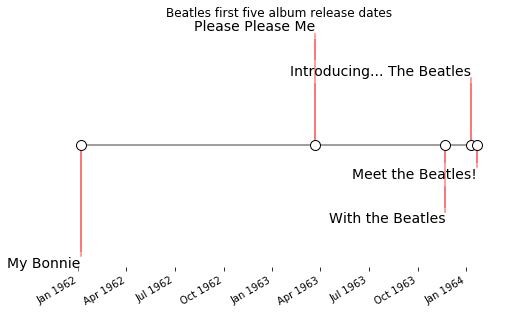

You will need to adjust the heights, font sizes, etc., to make it look clean.

Note that there is not direct function for plotting a module, you will just need to iterate over the values to create several overlaid plots with desired effects.

#### Points breakup:
This problem is worth 50 points, and first two subparts are worth 20 points each. For the plotting subpart, a clean looking plot with all information will fetch you 10 points. A cluttered plot, with all information, will only fetch you 5 points.

In [1]:
def getPresidents(url):
    ## add your code here
    urlreq = requests.get(url)
    urltext = urlreq.text
    urllines = re.split(r'\n',urltext)
    pattern = re.compile(r'Presidency of (?P<name>.*)">\d.*</a>')
    president_name = re.findall(pattern, urltext)
    president_names = []
    [president_names.append(i) for i in president_name if not i in president_names]
    president_names.append('Grover Cleveland')
    return president_names


In [2]:
def getBirthdays(url):
    names = getPresidents(url)
    wiki_web=[]
    birthday = []
    for i in range(len(names)):
        wiki_web.append("https://en.wikipedia.org/wiki/_" + str(names[i]).replace(" ", "_"))
    for i in range(len(names)):
        urlreq = requests.get(wiki_web[i])
        urltext = urlreq.text
        urllines = re.split(r'\n',urltext)
        birthday.append(re.findall(r'(?<=class="bday">).*?(?=\<)',urltext))
    birthday = pd.Series(birthday)
    d={'Name':names,'Birthday':birthday}
    data=pd.DataFrame(d)
    return data

In [3]:
### Part 1
import requests
import re
url = "https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_States"
names = getPresidents(url)
print(names)

['George Washington', 'John Adams', 'Thomas Jefferson', 'James Madison', 'James Monroe', 'John Quincy Adams', 'Andrew Jackson', 'Martin Van Buren', 'William Henry Harrison', 'John Tyler', 'James K. Polk', 'Zachary Taylor', 'Millard Fillmore', 'Franklin Pierce', 'James Buchanan', 'Abraham Lincoln', 'Andrew Johnson', 'Ulysses S. Grant', 'Rutherford B. Hayes', 'Chester A. Arthur', 'Benjamin Harrison', 'William McKinley', 'Theodore Roosevelt', 'William Howard Taft', 'Woodrow Wilson', 'Warren G. Harding', 'Calvin Coolidge', 'Herbert Hoover', 'Franklin D. Roosevelt', 'Harry S. Truman', 'Dwight D. Eisenhower', 'John F. Kennedy', 'Lyndon B. Johnson', 'Richard Nixon', 'Gerald Ford', 'Jimmy Carter', 'Ronald Reagan', 'George H. W. Bush', 'Bill Clinton', 'George W. Bush', 'Barack Obama', 'Donald Trump', 'James A. Garfield', 'Grover Cleveland']


In [4]:
### Part 2
import pandas as pd
data = getBirthdays(url)
print(data)
### after sorting by birthday
data_new = (data.sort_values(by=['Birthday']))
data_new

                      Name      Birthday
0        George Washington  [1732-02-22]
1               John Adams  [1735-10-30]
2         Thomas Jefferson  [1743-04-13]
3            James Madison  [1751-03-16]
4             James Monroe  [1758-04-28]
5        John Quincy Adams  [1767-07-11]
6           Andrew Jackson  [1767-03-15]
7         Martin Van Buren  [1782-12-05]
8   William Henry Harrison  [1773-02-09]
9               John Tyler  [1790-03-29]
10           James K. Polk  [1795-11-02]
11          Zachary Taylor  [1784-11-24]
12        Millard Fillmore  [1800-01-07]
13         Franklin Pierce  [1804-11-23]
14          James Buchanan  [1791-04-23]
15         Abraham Lincoln  [1809-02-12]
16          Andrew Johnson  [1808-12-29]
17        Ulysses S. Grant  [1822-04-27]
18     Rutherford B. Hayes  [1822-10-04]
19       Chester A. Arthur  [1829-10-05]
20       Benjamin Harrison  [1833-08-20]
21        William McKinley  [1843-01-29]
22      Theodore Roosevelt  [1858-10-27]
23     William H

,Name,Birthday
0,George Washington,[1732-02-22]
1,John Adams,[1735-10-30]
2,Thomas Jefferson,[1743-04-13]
3,James Madison,[1751-03-16]
4,James Monroe,[1758-04-28]
6,Andrew Jackson,[1767-03-15]
5,John Quincy Adams,[1767-07-11]
8,William Henry Harrison,[1773-02-09]
7,Martin Van Buren,[1782-12-05]
11,Zachary Taylor,[1784-11-24]


In [1]:
### Part 3
### add plotting code here
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

data_new = data.sort_values(by=['Birthday'])
presidents_names=list(data_new['Name'])
presidents_birthday=list(data_new['Birthday'])

lines = np.array([-5, 5, -3, 3, -1, 1])
fig, ax = plt.subplots(figsize=(40, 20))

for number, (pre_date,pre_name) in enumerate(zip(presidents_birthday,presidents_names)):
    level = lines[number % 6]
    vert = 'top' if level < 0 else 'bottom'

    ax.scatter(pre_date, 0, s=30, facecolor='w', edgecolor='k', zorder=9999)
    ax.plot((pre_date, pre_date), (0, level), c='r', alpha=.7)
    ax.text(pre_date, level, pre_name,
            horizontalalignment='right', verticalalignment=vert, fontsize=14,
            backgroundcolor=(1., 1., 1., .3))

ax.set(title="Birthday TimeLine of US Presidents")
fig.autofmt_xdate()
plt.show()

NameError: name 'data' is not defined

### Problem 2 - Chicago Crime Data (25 points)

The Chicago Crime Data reflects the crime incidents that occured in the city of Chicago during 2016 and 2017. The data is provided in the `chicago_crime_data_v3.csv` file. For each crime incident, there is information regarding the case ID, crime location, description, primary crime type ID, coordinates of the crime etc. To identify the primary crime type (denoted by the `Primary type` variable), the `primary_type_ID.csv` file is provided which maps the primary crime type to their corresponding ID.

For this problem, the goal is to identify the crime types that have occurred more than 10,000 times during the years 2016 and 2017. For this,

1. Import the CSV files as dataframes using pandas.

2. Sort the crime data file by crime ID and merge the two files by `Primary Type ID` variable. 

3. Identify the crime types that have a frequency >10,000 and list them as `High Frequency Crime Types`. Provide a timeseries plot for all `High Frequency Crime Types`. For this, compute the number of crimes that occur per each crime type per month (2016 Jan - 2017 Dec). Use the `series.plot` method in Pandas for Series objects. 

4. Using the code provided below, plot all the crimes that come under `High Frequency Crime Types` on a map of Chicago. For this, use the location information provided in the data. For any crimes with missing location coordinates, sort the data by ascending `Date` and use forward fill.  

(Make sure that each data point must be plotted as a transparent circular dots with a markersize of atleast 20 and alpha set to atmost 0.5 (transparency))

_Installation Notes_: You will need the `basemap` package. You can get that using:
```script
conda install basemap
```

Due to some bug in the way `conda` maintains environmental variables, the following import statement might not work:
```python
from mpl_toolkits.basemap import Basemap
```

If it does not work on your computer, try the following:
```python
import os,conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
```

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

crime_data = pd.read_csv('C:\\Users\\ABLO\\Downloads\\chicago_crime_data_v3.csv')
chicago_crime_data_v3= pd.DataFrame(crime_data)
print(chicago_crime_data_v3)

         Cime_ID Case Number             Date  \
0       10496347    HZ237390  4/23/2016 16:55   
1       10496348    HZ237355  4/23/2016 14:00   
2       10496349    HZ237341  4/23/2016 16:10   
3       10496350    HZ237330  4/23/2016 13:30   
4       10496351    HZ237402  4/23/2016 16:45   
5       10496352    HZ237376  4/23/2016 16:39   
6       10496353    HZ237358   4/23/2016 7:00   
7       10496354    HZ237396  4/23/2016 12:00   
8       10496355    HZ237254   4/23/2016 1:00   
9       10496356    HZ237248  4/23/2016 15:10   
10      10496360    HZ237394  4/23/2016 16:58   
11      10496361    HZ237371   4/23/2016 9:00   
12      10496362    HZ237399  4/23/2016 17:00   
13      10496365    HZ237135  4/23/2016 13:15   
14      10496368    HZ237362  4/23/2016 13:30   
15      10496369    HZ237241  4/23/2016 14:50   
16      10496370    HZ237354  4/23/2016 16:30   
17      10496372    HZ237331  4/23/2016 15:59   
18      10496378    HZ237366  4/23/2016 16:30   
19      10496379    

In [14]:
primary_type_id = pd.read_csv('C:\\Users\\ABLO\\Downloads\\primary_type_id.csv')
primary_type_df = pd.DataFrame(primary_type_id)
print(primary_type_df)


                         Primary Type  Primary Type ID
0                               ARSON                1
1                             ASSAULT                2
2                             BATTERY                3
3                            BURGLARY                4
4   CONCEALED CARRY LICENSE VIOLATION                5
5                 CRIM SEXUAL ASSAULT                6
6                     CRIMINAL DAMAGE                7
7                   CRIMINAL TRESPASS                8
8                  DECEPTIVE PRACTICE                9
9                            GAMBLING               10
10                           HOMICIDE               11
11                  HUMAN TRAFFICKING               12
12   INTERFERENCE WITH PUBLIC OFFICER               13
13                       INTIMIDATION               14
14                         KIDNAPPING               15
15               LIQUOR LAW VIOLATION               16
16                MOTOR VEHICLE THEFT               17
17        

In [23]:
sort_crime_data = crime_data.sort_values(by ='Cime_ID')
merge_data = pd.merge(sort_crime_data, primary_type_df, on = 'Primary Type ID')
merge_data


crime_type = merged_data.groupby('Primary Type')['Primary Type'].count()
crime_type_df = pd.DataFrame(crime_type)
crime_type_df
high_freq_crime = crime_type_df[crime_type_df['Primary Type'] > 10000]
primary_type_df

,Primary Type,Primary Type ID
0,ARSON,1
1,ASSAULT,2
2,BATTERY,3
3,BURGLARY,4
4,CONCEALED CARRY LICENSE VIOLATION,5
5,CRIM SEXUAL ASSAULT,6
6,CRIMINAL DAMAGE,7
7,CRIMINAL TRESPASS,8
8,DECEPTIVE PRACTICE,9
9,GAMBLING,10


In [24]:

#####nd merge the two files by Primary Type ID variable######

sort_crime_data = crime_data.sort_values(by ='Cime_ID')
merge_data = pd.merge(sort_crime_data, primary_type_df, on = 'Primary Type ID')
merge_data
#merged_data.groupby('Primary Type ID').count()
crime_type = merge_data.groupby('Primary Type')['Primary Type'].count()
crime_type_df = pd.DataFrame(crime_type)
crime_type_df
high_freq_crime = crime_type_df[crime_type_df['Primary Type'] > 10000]
high_freq_crime

,Primary Type
Primary Type,
ASSAULT,31143
BATTERY,81995
BURGLARY,22524
CRIMINAL DAMAGE,49746
CRIMINAL TRESPASS,10747
DECEPTIVE PRACTICE,28994
MOTOR VEHICLE THEFT,18505
NARCOTICS,20184
OTHER OFFENSE,28597


In [25]:
import datetime
merged_data_df = pd.DataFrame(merged_data)
merged_data_df
new_data = merged_data_df[(merged_data_df['Primary Type'] == 'ASSAULT') | (merged_data_df['Primary Type'] == 'BATTERY') | (merged_data_df['Primary Type'] == 'BURGLARY') | (merged_data_df['Primary Type'] == 'CRIMINAL DAMAGE') | (merged_data_df['Primary Type'] == 'CRIMINAL TRESPASS') | (merged_data_df['Primary Type'] == 'DECEPTIVE PRACTICE') | (merged_data_df['Primary Type'] == 'MOTOR VEHICLE THEFT') | (merged_data_df['Primary Type'] == 'NARCOTICS') | (merged_data_df['Primary Type'] == 'OTHER OFFENSE') | (merged_data_df['Primary Type'] == 'ROBBERY') | (merged_data_df['Primary Type'] == 'THEFT') ]
new_data

,Cime_ID,Case Number,Date,Block,Primary Type ID,Description,Location Description,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Primary Type
1235,10364665,HZ100012,1/1/2016 0:01,014XX S AVERS AVE,7,TO PROPERTY,APARTMENT,1150945.0,1892794.0,2016,1/10/2016 8:46,41.861718,-87.721386,"(41.861717546, -87.721386272)",CRIMINAL DAMAGE
1236,10364673,HZ100011,1/1/2016 0:20,021XX N CALIFORNIA AVE,7,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),1157345.0,1914452.0,2016,1/10/2016 8:46,41.921021,-87.697304,"(41.921021491, -87.69730355)",CRIMINAL DAMAGE
1237,10364678,HZ100055,1/1/2016 1:20,005XX N LOCKWOOD AVE,7,TO PROPERTY,APARTMENT,1140947.0,1902786.0,2016,1/10/2016 8:46,41.889327,-87.757842,"(41.889326577, -87.757841738)",CRIMINAL DAMAGE
1238,10364694,HZ100021,1/1/2016 0:35,085XX W BRYN MAWR AVE,7,TO PROPERTY,HOTEL/MOTEL,1118477.0,1936072.0,2016,1/10/2016 8:46,41.981052,-87.839659,"(41.981051826, -87.839658835)",CRIMINAL DAMAGE
1239,10364705,HZ100083,1/1/2016 1:37,072XX S SACRAMENTO AVE,7,TO PROPERTY,RESIDENCE,1157623.0,1856549.0,2016,1/10/2016 8:46,41.762123,-87.697856,"(41.762123352, -87.697856228)",CRIMINAL DAMAGE
1240,10364723,HZ100051,1/1/2016 0:01,020XX W WASHINGTON BLVD,7,TO PROPERTY,RESIDENCE,1162793.0,1900685.0,2016,1/10/2016 8:46,41.883131,-87.677673,"(41.883131184, -87.677672969)",CRIMINAL DAMAGE
1241,10364724,HZ100086,1/1/2016 1:47,015XX N WESTERN AVE,7,TO VEHICLE,STREET,1160132.0,1910073.0,2016,1/10/2016 8:46,41.908948,-87.687185,"(41.908948011, -87.687184685)",CRIMINAL DAMAGE
1242,10364754,HZ100025,1/1/2016 0:05,072XX S RHODES AVE,7,TO PROPERTY,RESIDENCE,1181159.0,1857139.0,2016,1/10/2016 8:46,41.763233,-87.611576,"(41.763232864, -87.611576015)",CRIMINAL DAMAGE
1243,10364767,HZ100113,1/1/2016 2:05,013XX S KARLOV AVE,7,TO PROPERTY,APARTMENT,1149263.0,1893553.0,2016,1/10/2016 8:46,41.863833,-87.727541,"(41.863833067, -87.727540998)",CRIMINAL DAMAGE
1244,10364789,HZ100152,1/1/2016 2:00,132XX S DR MARTIN LUTHER KING JR DR,7,TO PROPERTY,RESIDENCE,1181061.0,1817544.0,2016,1/10/2016 8:46,41.654581,-87.613149,"(41.654581281, -87.613148937)",CRIMINAL DAMAGE


In [29]:
import datetime
import dateutil
from dateutil import parser

merged_data_df = pd.DataFrame(merged_data)
merged_data_df
new_data = merged_data_df[(merged_data_df['Primary Type'] == 'ASSAULT') | (merged_data_df['Primary Type'] == 'BATTERY') | (merged_data_df['Primary Type'] == 'BURGLARY') | (merged_data_df['Primary Type'] == 'CRIMINAL DAMAGE') | (merged_data_df['Primary Type'] == 'CRIMINAL TRESPASS') | (merged_data_df['Primary Type'] == 'DECEPTIVE PRACTICE') | (merged_data_df['Primary Type'] == 'MOTOR VEHICLE THEFT') | (merged_data_df['Primary Type'] == 'NARCOTICS') | (merged_data_df['Primary Type'] == 'OTHER OFFENSE') | (merged_data_df['Primary Type'] == 'ROBBERY') | (merged_data_df['Primary Type'] == 'THEFT') ]
new_data

new_data['Date'] = pd.to_datetime(new_data['Date'],format = '%m/%d/%Y %H:%M')
new_data['Date'] = new_data['Date'].dt.strftime('%Y/%m')
new_data


count_by_date = new_data.pivot_table('Primary Type ID',columns = 'Primary Type', index ='Date',aggfunc=np.size)
count_by_date

C:\Users\ABLO\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ABLO\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Primary Type,ASSAULT,BATTERY,BURGLARY,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,NARCOTICS,OTHER OFFENSE,ROBBERY,THEFT
Date,,,,,,,,,,,
2016/01,1225,3727,1182,2373,462,1488,985,1143,1338,1041,4484
2016/02,1241,3497,843,2089,438,1452,837,1296,1313,702,4002
2016/03,1640,4274,1048,2538,499,1509,783,1468,1571,785,4658
2016/04,1508,4027,946,2392,505,1478,758,1447,1415,771,4589
2016/05,1786,4714,1106,2733,586,1398,824,1390,1572,960,5042
2016/06,1816,4849,1080,2641,590,1615,935,1270,1499,905,5346
2016/07,1711,4685,1349,2987,568,1455,1039,1241,1507,1127,5817
2016/08,1761,4587,1372,2973,578,1619,1026,857,1502,1238,5989
2016/09,1693,4314,1372,2846,579,1534,983,887,1347,1028,5729


In [32]:
import numpy as np
import matplotlib.pyplot as plt

### Basemap not working, but this is how the code would be written

from mpl_toolkits.basemap import Basemap

new_data.sort_values(by=['Date'],ascending = True)
new_data['Latitude'].fillna(method="ffill")
new_data['Longitude'].fillna(method="ffill")

#new_data
lons = new_data['Longitude'].tolist()
lats = new_data['Latitude'].tolist()
fig = plt.figure(figsize=[16,10])
m = Basemap(projection='merc',llcrnrlat=41.60,urcrnrlat=42.10,\
        llcrnrlon=-88.0,urcrnrlon=-87.50,lat_ts=20,resolution='c')
m.readshapefile('./geo_export_0e3da441-8fe8-4e11-9ca0-42ef75cab68e','chicago')
lons = [-87.6,-87.7]
lats = [41.65,41.75]
x,y = m(lons,lats)
plt.scatter(x,y,alpha=0.5,s=20)
plt.title("Chicago Cenus")
plt.show()



ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

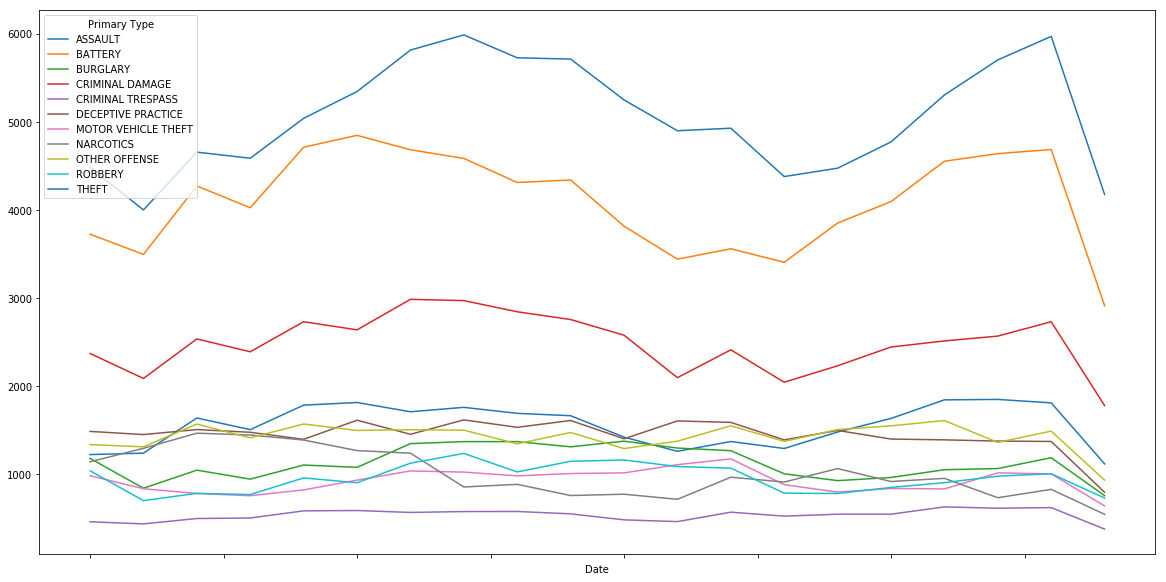

In [35]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
count_by_date.plot(ax=ax)
plt.show()

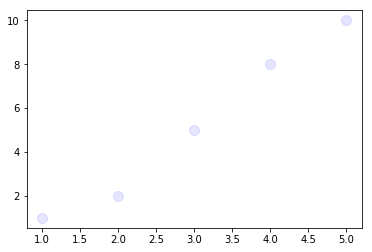

In [26]:
#Sample plot points 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

x=[1,2,3,4,5]
y=[1,2,5,8,10]
plt.plot(x,y,'bo', markersize=10,alpha=0.1)

### Problem 3 - Benchmarking Problem (25 Points)

Numpy has in-built universal functions that allow operations on multidimentional arrays. For this problem, you will be asked to test the performance of some of this functions.

For this, create an `NxN` matrix `A` and an array `B` of size `N`, with random entries (use `numpy.random`). Using `A` and `B` as inputs, performing the following operations: (compare and time the performance of sorting algorithms with and without numpy ufunc)

1. Sorting `B` (you can use `numpy.sort`) for `N` ranging from 1000 to 25000 (take steps of 1000)
2. Computing Determinant of `A` ( you can use `numpy.linalg.det` to compute the determinant of the matrix) for `N` ranging from 100 to 800 (take steps of 50)
3. Matrix Multiplication of `A*A` ( use `numpy.matmul`) for `N` ranging from 100 to 1500 

Plot the operation times for Numpy functions vs regular python commands for each operation.

The final output must include 3 plots comparing the performance of universal functions in Numpy with similar analogs in python for each operation. Provide a breif interpretation from the plots. (Feel free to test around the range of `N` for this problem).

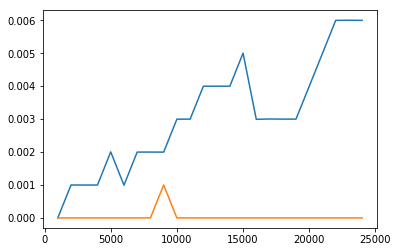

In [37]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline 


times_np_sort = []
times_norm_sort = []
indices = []
def Sorting():
    for N in range(1000,25000,1000):
        B = np.arange(N)
        s_np_sort = time.time()
        np.sort(B)
        e_np_sort = time.time()
        time_np_sort = e_np_sort-s_np_sort
        times_np_sort.append(time_np_sort)
       
        s_norm_sort = time.time()
        sorted(B)
        e_norm_sort = time.time()
        time_norm_sort = e_norm_sort-s_norm_sort
        times_norm_sort.append(time_norm_sort)
        indices.append(N)
    plt.plot(indices,times_norm_sort)
    plt.plot(indices,times_np_sort)   
    
    
Sorting()

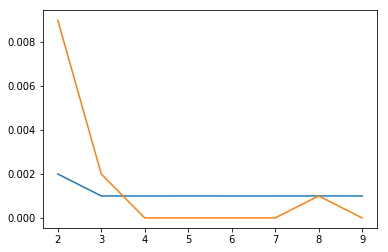

In [38]:
import random
import time
import copy
times_np_det = [] 
times_norm_det = []
index = []
def Determinant(): 
    for L in range(2,10):
        A_one = np.arange(L*L).reshape(L,L)
        s_np_det = time.time()
        det_np = np.linalg.det(A_one)
        e_np_det = time.time()
        time_np_det = e_np_det - s_np_det
        times_np_det.append(time_np_det)
        s_norm_det = time.time()
        if A_one.shape == 2:
            det_norm = (A_one[0]*A_one[3] - A_one[1]*A_one[2])

        else:
           
            det_norm = sum([(-1)**i * A_one[i, 0] * np.linalg.det(np.delete(np.delete(A_one, 0, 1), i, 0)) for i in range(A_one.shape[0])]) if A_one.shape != (1, 1) else A_one[0, 0]
  

        e_norm_det = time.time()
        index.append(L)
        time_norm_det = e_norm_det - s_norm_det
        times_norm_det.append(time_norm_det)

    plt.plot(index,times_norm_det)
    plt.plot(index,times_np_det)
    plt.show()
Determinant()

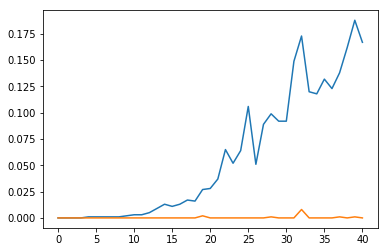

In [39]:
import random
times_np_mul = []
times_norm_mul = []
index = []

def mul_Matrix():
    for M in range(random.randint(10,50)):
        #M = np.random.randint(1,20)
        #print(M)
        A_two = np.arange(M*M).reshape(M,M)
        

    ########Using Numpy###########
        s_np_mul = time.time()
        np_mul = np.dot(A_two,A_two)
        e_np_mul = time.time()
        mul_time_np = e_np_mul - s_np_mul
        times_np_mul.append(mul_time_np)

        result = np.zeros((M,M))
        s_norm_mul = time.time()
        for i in range(len(A_two)):
            for j in range(len(A_two[0])):
                for k in range(len(A_two)):
                    result[i][j] += A_two[i][k] * A_two[k][j]
        e_norm_mul = time.time()
        mul_time_norm = e_norm_mul - s_norm_mul
        times_norm_mul.append(mul_time_norm)
        index.append(M)

    plt.plot(index,times_norm_mul)
    plt.plot(index,times_np_mul)   

mul_Matrix()